In [42]:
import xarray as xr
import os
import glob
import numpy as np
import warnings
import matplotlib.pyplot as plt
import sys

sys.path.append(os.path.abspath('../src-double-gyre'))
warnings.filterwarnings("ignore")
from helpers.collection_of_experiments import CollectionOfExperiments

%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

In [62]:
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2023/R4-sensitivity', additional_subfolder='output')

In [64]:
for RR in ['R4', 'R64']:
    ds.remesh(RR, 'R1')
    ds.remesh(RR, 'R2')
    if RR != 'R4':
        ds.remesh(RR, 'R4')

Experiment R4 coarsegrained to R1 is created. Its identificator=R4_R1
Experiment R4 coarsegrained to R2 is created. Its identificator=R4_R2
Experiment R64 coarsegrained to R1 is created. Its identificator=R64_R1
Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4


# Choosing the coarsesnt mesh possible for optimization problem
We choose coarse resolution 1 degree mostly to be prepared for global ocean model

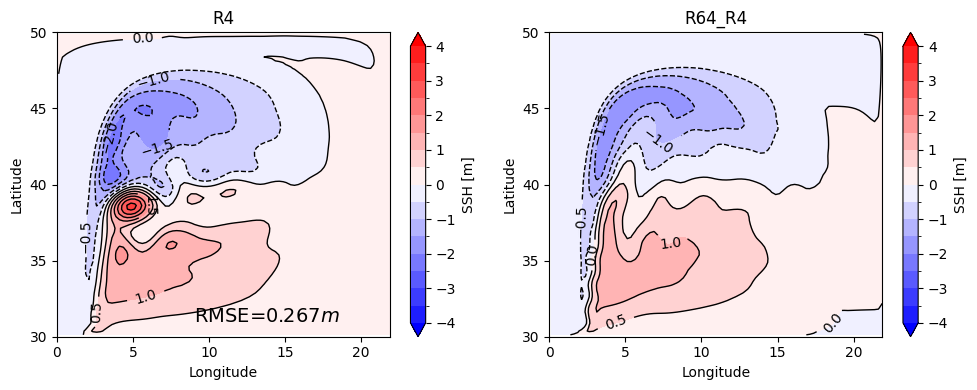

In [65]:
ds.plot_ssh(['R4', 'R64_R4'])

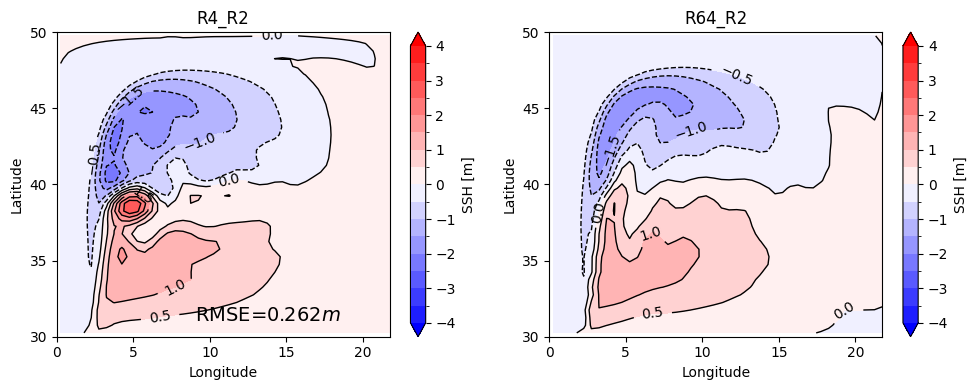

In [66]:
ds.plot_ssh(['R4_R2', 'R64_R2'])

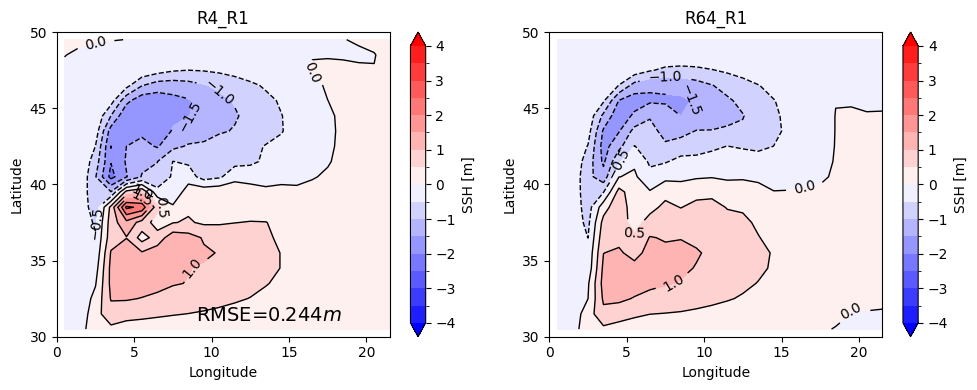

In [67]:
ds.plot_ssh(['R4_R1', 'R64_R1'])

In [114]:
ds['R4_R1'].ssh_mean.data.ravel().shape

(440,)

# Compute error covariance matrix from internal variability of coarse and high-resolution models

In [99]:
Noise_variance = (ds['R4_R1'].ea.coarsen({'Time':60}, boundary='trim').mean()[1:].isel(zi=0).var('Time') + \
                 ds['R64_R1'].ea.coarsen({'Time':60}, boundary='trim').mean()[1:].isel(zi=0).var('Time')).compute()

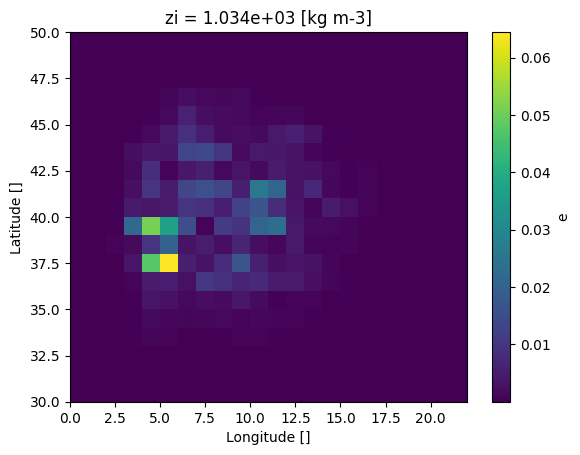

In [104]:
Noise_variance.plot()

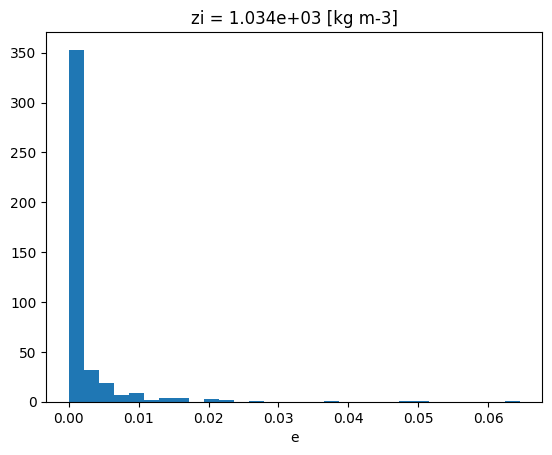

In [111]:
# For the first iteration, we do not want to provide a very accurate noise covariance matrix. Mostly because this would change the optimization objective which is different from our target (RMSE).
# We use noise variance 0.01 which holds most of the support of the variance distribution.
Noise_variance.plot.hist(bins=30);

# Justification of choosing time-averaging interval

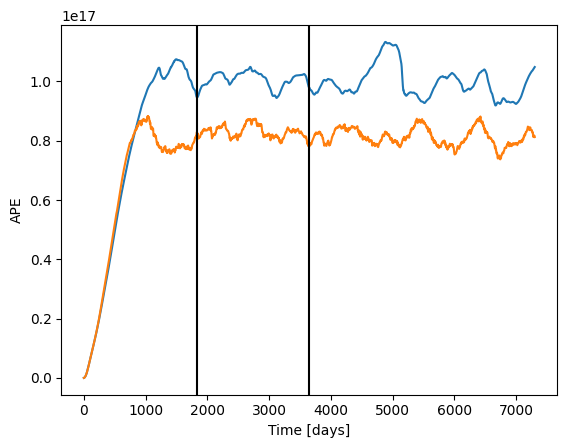

In [130]:
ds['R4'].series.APE.sum('Interface').plot()
ds['R64'].series.APE.sum('Interface').plot()
plt.axvline(x=365*5, color='k')
plt.axvline(x=365*10, color='k')

In [137]:
np.isnan(ds['R4'].ea[-1][0].coarsen({'xh':4, 'yh':4}).mean()).sum().compute()

<xarray.DataArray 'e' ()> Size: 8B
array(0)
Coordinates:
    Time     float64 8B 7.275e+03
    zi       float64 8B 1.034e+03